# Exploratory Data Analysis & Data Visualization

### BCC - Data Science Department Internship 2024 - Week 2

In [2]:
# import semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import dataset ke dalam notebook
df = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Dataset\\Raw\\climate_vs_flood.csv', header=0)
df

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


In [4]:
# mengecek nilai duplikat
df.duplicated().sum()

0

In [5]:
# mengecek nilai pemusatan data dan distribusi data tiap kolom numerik
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,flood
count,5996.000000,6095.000000,6262.000000,6256.000000,3993.000000,5049.000000,6286.000000,6286.000000,6215.000000,6308.000000,6308.000000
mean,25.397598,32.577129,28.338135,76.903932,9.415502,5.008160,4.991887,193.518772,2.338214,96741.052949,0.075460
std,3.226555,5.571823,1.798969,9.719251,18.460319,2.788718,5.856961,109.211671,1.857624,5.239928,0.264153
min,2.400000,21.300000,23.700000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96733.000000,0.000000
25%,24.400000,31.800000,27.700000,72.000000,0.000000,2.800000,4.000000,80.000000,1.000000,96733.000000,0.000000
50%,25.000000,32.600000,28.400000,77.000000,1.400000,5.400000,4.000000,230.000000,2.000000,96741.000000,0.000000
75%,26.000000,33.400000,29.100000,82.000000,10.500000,7.100000,5.000000,280.000000,3.000000,96745.000000,0.000000
max,246.000000,334.000000,141.600000,488.000000,277.500000,11.600000,185.000000,360.000000,82.000000,96747.000000,1.000000


### Eksplorasi Data Kategorikal

In [6]:
# mengecek nilai unique dari tiap kolom kategorikal
print("Unique Value of region_name : ", df['region_name'].nunique())
print("Unique Value of station_id : ", df['station_id'].nunique())
print("Unique Value of ddd_car : ", df['ddd_car'].nunique())
print("Unique Value of station_name : ", df['station_name'].nunique())

Unique Value of region_name :  4
Unique Value of station_id :  4
Unique Value of ddd_car :  9
Unique Value of station_name :  4


In [7]:
df['ddd_car'].unique()

array(['S ', 'W ', 'SW', 'E ', 'SE', 'NE', 'C ', 'N ', 'NW', nan],
      dtype=object)

Ada banyak cara untuk melakukan visualisasi terhadap jumlah tiap-tiap nilai unik, untuk kolom kategori pada dataset ini kami menggunakan grouping terlebih dahulu.

In [8]:
# grouping untuk visualisasi jumlah masing-masing arah mata angin
df_ddd_car_sum = df.groupby('ddd_car', as_index=0).agg(ddd_cnt=('ddd_car', 'count'))
df_ddd_car_sum

,ddd_car,ddd_cnt
0,C,1239
1,E,626
2,N,1681
3,NE,432
4,NW,158
5,S,258
6,SE,235
7,SW,305
8,W,1273


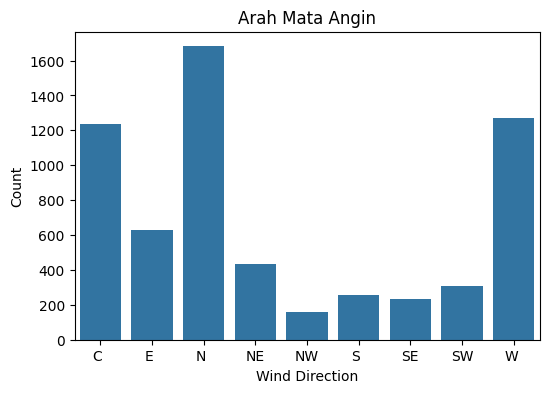

In [9]:
# visualisasi jumlah nilai unik tiap arah mata angin
fig2 = plt.figure(figsize=(6,4))
sns.barplot(data=df_ddd_car_sum, x=df_ddd_car_sum['ddd_car'], y=df_ddd_car_sum['ddd_cnt'])
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.title('Arah Mata Angin')
plt.show()

Pada keempat kolom kategorikal 3 diantaranya memiliki nilai unik yang sama yakni 4. Ketiganya juga merupakan kolom kategori yang menunjukkan tempat atau wilayah pencatatan data. Namun apakah ketiganya itu merujuk pada satu tempat yang sama?

In [10]:
# Apakah stasiun dan region merupakan tempat yang sama?
df_region = df.groupby(['station_id', 'region_name', 'station_name'], as_index=0).agg(station_cnt=('station_id', 'count'))
df_region

,station_id,region_name,station_name,station_cnt
0,96733,Jakarta Selatan,Stasiun Klimatologi Banten,1658
1,96741,Jakarta Utara,Stasiun Meteorologi Maritim Tanjung Priok,1779
2,96745,Jakarta Pusat,Stasiun Meteorologi Kemayoran,1814
3,96747,Jakarta Timur,Halim Perdana Kusuma Jakarta,1057


In [11]:
# mengecek jumlah stasiun pada grouping apakah telah sama dengan dataset
df_region['station_cnt'].sum()

6308

Dari nilai jumlah diatas menunjukkan bahwa di dalam dataset ini hanya terdapat 4 jumlah stasiun saja. Untuk lebih jelasnya lagi bisa dilihat dalam visualisasi data berikut :

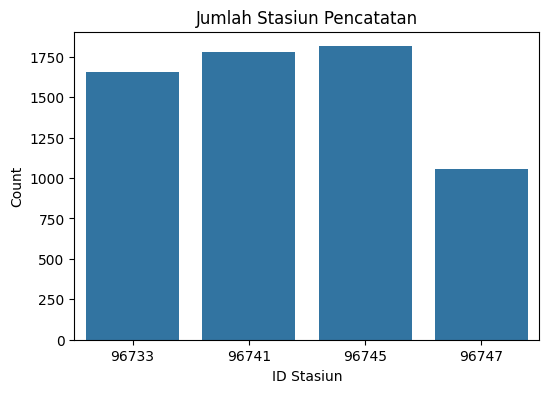

In [12]:
# Jumlah masing-masing stasiun ataupun daerah pencatatan
fig2 = plt.figure(figsize=(6, 4))
sns.barplot(data=df_region, x=df_region['station_id'], y=df_region['station_cnt'])
plt.xlabel('ID Stasiun')
plt.ylabel('Count')
plt.title('Jumlah Stasiun Pencatatan')
plt.show()

In [13]:
# mengubah tipe data object menjadi date
df['date'] = pd.to_datetime(df['date'])

In [14]:
# cek apakah tipe data sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6308 non-null   datetime64[ns]
 1   Tn            5996 non-null   float64       
 2   Tx            6095 non-null   float64       
 3   Tavg          6262 non-null   float64       
 4   RH_avg        6256 non-null   float64       
 5   RR            3993 non-null   float64       
 6   ss            5049 non-null   float64       
 7   ff_x          6286 non-null   float64       
 8   ddd_x         6286 non-null   float64       
 9   ff_avg        6215 non-null   float64       
 10  ddd_car       6207 non-null   object        
 11  station_id    6308 non-null   int64         
 12  station_name  6308 non-null   object        
 13  region_name   6308 non-null   object        
 14  flood         6308 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

Setelah ditelusuri ternyata pada dataset hanya digabung bukan sesuai urutan tahun tetapi urutan stasiun. Sehingga index pertama hingga index ke-1658 adalah stasiun klimatologi banten yang berada di Jakarta Selatan kemudian seterusnya hingga stasiun terakhir. Hal ini bisa dilihat pada rentang pada dataset adalah sama yaitu dari tahun 2016-2020, namun panjang data tiap stasiun tidak sama.

### Eksplorasi Data Target (Flood)

Eksplorasi ini bertujuan untuk mengetahui apakah terjadi ketidakseimbangan jumlah data target dimana banjir dan tidak

In [15]:
# membuat grouping untuk mengetahui jumlah masing-masing kategori dan untuk bisa divisualisasikan
df_flood_sum = df.groupby('flood').agg(cat_cnt=('flood', 'count'))
df_flood_sum

,cat_cnt
flood,
0,5832
1,476


Berdasarkan data grouping bisa diketahui kasus dimana tidak banjir ada sebanyak 5832 kasus, sedangkan kasus banjir ada sebanyak 476 kasus

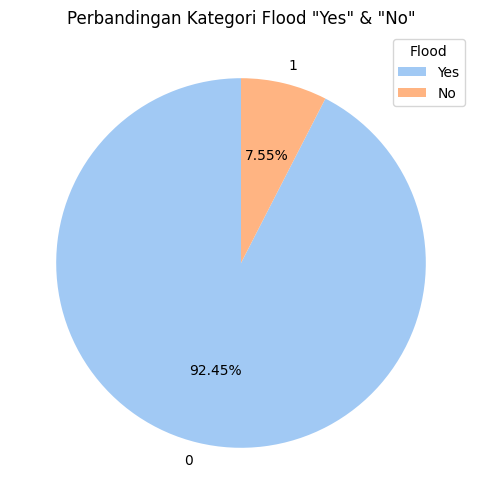

In [16]:
# visualisasi perbandingan kategori banjir dan tidak banjir
colors = sns.color_palette("pastel")

plt.figure(figsize=(6, 6))
plt.pie(df_flood_sum['cat_cnt'], labels=df_flood_sum.index, startangle=90, autopct='%1.2f%%', colors=colors)
plt.title('Perbandingan Kategori Flood "Yes" & "No"')

plt.legend(title='Flood', labels=['Yes', 'No'], loc='upper right')
plt.show()


Dari visualisasi diatas bisa disimpulkan juga terjadi ketimpangan label kategori yang mana kategori 0 atau tidak banjir memiliki jumlah yang lebih banyak

In [17]:
df_copy = df.copy()
df_copy['month'] = df['date'].dt.month

In [18]:
df_copy

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood,month
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0,1
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0,1
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0,12
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0,12
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0,12
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0,12


### Data yang hilang

In [19]:
df.isna().sum()

date               0
Tn               312
Tx               213
Tavg              46
RH_avg            52
RR              2315
ss              1259
ff_x              22
ddd_x             22
ff_avg            93
ddd_car          101
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64

Kolom curah hujan merupakan kolom dengan missing values terbanyak. Lalu kami berasumsi apakah data yang hilang ini memiliki pola tersendiri. Asumsi awal adalah tidak dilakukan pencatatan saat musim kemarau. Maka dari itu seharusnya data yang hilang paling banyak ada pada sekitar bulan April-September.

In [20]:
null_counts = df_copy[df_copy['RR'].isnull()].groupby('month').size()

In [21]:
null_counts

month
1     123
2      97
3     127
4     170
5     220
6     223
7     274
8     269
9     248
10    205
11    164
12    195
dtype: int64

Text(0.5, 1.0, 'Jumlah NaN Tiap Bulan')

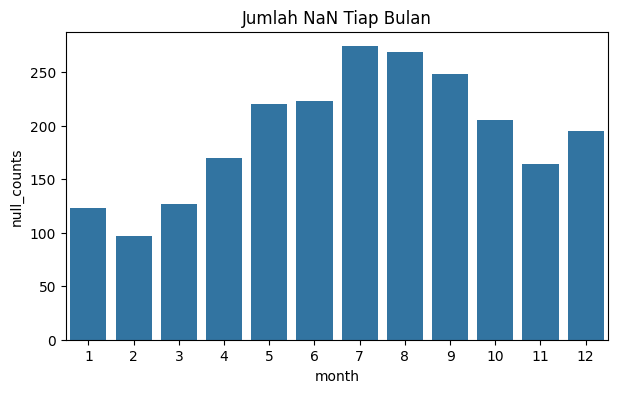

In [22]:
fig = plt.figure(figsize=(7,4))
sns.barplot(x=null_counts.index, y=null_counts)
plt.xlabel('month')
plt.ylabel('null_counts')
plt.title('Jumlah NaN Tiap Bulan')

Dari visualisasi di atas bisa disimpulkan bahwa nilai NaN paling sering ada di bulan-bulan Juni dan Juli yaitu lebih dari 250 nilai.

In [23]:
filtered_df = df_copy[(df_copy['month'] >= 4) & (df_copy['month'] <= 9)]
summer_null_count = filtered_df['RR'].isnull().sum()
summer_null_count

1404

In [24]:
filtered_df = df_copy[(df_copy['month'] < 4)]
rain_null_count = filtered_df['RR'].isnull().sum()
rain_null_count

347

In [25]:
filtered_df = df_copy[(df_copy['month'] > 9)]
rain_null_count = filtered_df['RR'].isnull().sum()
rain_null_count

564

Asumsi kami benar, namun bukan berarti ada perbedaan signifikan antara bulan-bulan musim hujan dan musim kemarau. Lalu apakah ada record dengan kategori banjir = 1, lalu data curah hujan memiliki data hilang atau NaN?

In [26]:
df_copy[(df['RR'].isnull()) & (df['flood']==1)]

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood,month
41,2016-02-11,25.4,25.4,27.3,89.0,NaN,0.2,3.0,270.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,2
80,2016-07-17,25.6,31.8,27.0,89.0,NaN,7.0,3.0,270.0,1.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,7
86,2016-07-23,23.0,33.6,27.3,83.0,NaN,2.5,3.0,50.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,7
113,2016-08-19,22.0,33.9,28.5,78.0,NaN,3.4,5.0,80.0,1.0,N,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,8
121,2016-08-27,24.0,32.4,26.2,87.0,NaN,4.3,4.0,180.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2018-03-13,24.0,30.8,27.1,82.0,NaN,NaN,6.0,260.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1,3
6036,2018-04-04,23.0,34.2,27.9,74.0,NaN,NaN,8.0,270.0,8.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1,4
6042,2018-04-10,24.2,33.8,28.6,74.0,NaN,NaN,6.0,260.0,6.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1,4
6049,2018-04-17,24.4,33.2,27.5,80.0,NaN,NaN,6.0,250.0,6.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,1,4


Ternyata juga ada nilai yang hilang pada kategori banjir = 1. Asumsi awal kami adalah kategori banjir = 1 hanya akan terjadi pada hujan lebat atau curah hujan dengan nilai lebih besar dari 50. Untuk membuktikan asumsi ini kami akan melakukan analisis hubungan banjir dengan fitur nilai curah hujan harian

In [27]:
# memisahkan data berdasarkan stasiun untuk kebutuhan eksplorasi selanjutnya
stasiun_1 = df[(df['date']>='2016-1-1')&(df['date']<='2020-12-30') & (df['region_name']=='Jakarta Selatan')]
stasiun_2 = df[(df['date']>='2016-1-1')&(df['date']<='2020-12-30') & (df['region_name']=='Jakarta Utara')]
stasiun_3 = df[(df['date']>='2016-1-1')&(df['date']<='2020-12-30') & (df['region_name']=='Jakarta Timur')]
stasiun_4 = df[(df['date']>='2016-1-1')&(df['date']<='2020-12-30') & (df['region_name']=='Jakarta Pusat')]

In [28]:
stasiun_3.isna().sum()

date               0
Tn                 2
Tx                 5
Tavg               1
RH_avg             5
RR               571
ss              1057
ff_x              17
ddd_x             17
ff_avg            88
ddd_car          100
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64

Pada stasiun 3 semua data pada kolom ss adalah NaN. Kami akan pertimbangkan bagaimana langkah selanjutnya dengan melakukan analisis korelasi antar fitur terlebih dahulu

### Outliers atau Pencilan

Memeriksa outliers dari Tx,Tavg,RH_avg,ss,ff_x, ddd_x

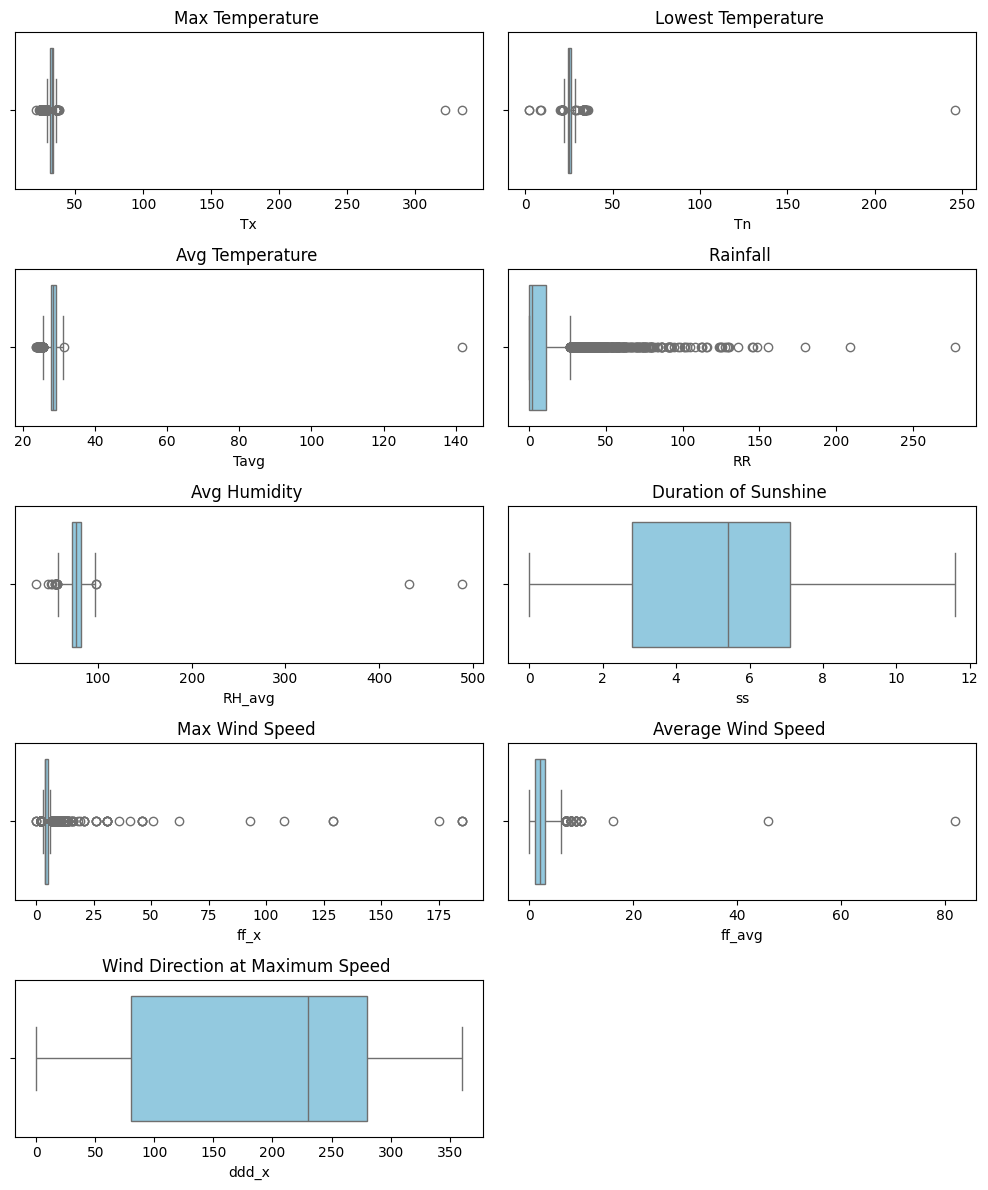

In [29]:
judul = {
    'Tx': 'Max Temperature ',
    'Tn': 'Lowest Temperature ',
    'Tavg': 'Avg Temperature ',
    'RR': 'Rainfall ',
    'RH_avg': 'Avg Humidity ',
    'ss': 'Duration of Sunshine ',
    'ff_x': 'Max Wind Speed ',
    'ff_avg': 'Average Wind Speed ',
    'ddd_x': 'Wind Direction at Maximum Speed '
}

fitur = ['Tx', 'Tn',  'Tavg', 'RR', 'RH_avg', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

plt.figure(figsize=(10, 12))
n_cols = 2
n_rows = 5

# Membuat boxplot untuk setiap fitur menggunakan loop
for i, col in enumerate(fitur, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=col, data=df, color='skyblue')
    plt.title(f'{judul[col]}')  
    plt.ylabel('')

plt.tight_layout()
plt.show()

Untuk lebih jelasnya lagi mengenai distribusi data, kami membuat visualisasi scatter dibawah ini

In [30]:
def plot_weather_data(df, x_column, y_column, title, x_label, y_label):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column]) 
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45) 
    plt.grid(True)
    plt.tight_layout()
    plt.show()


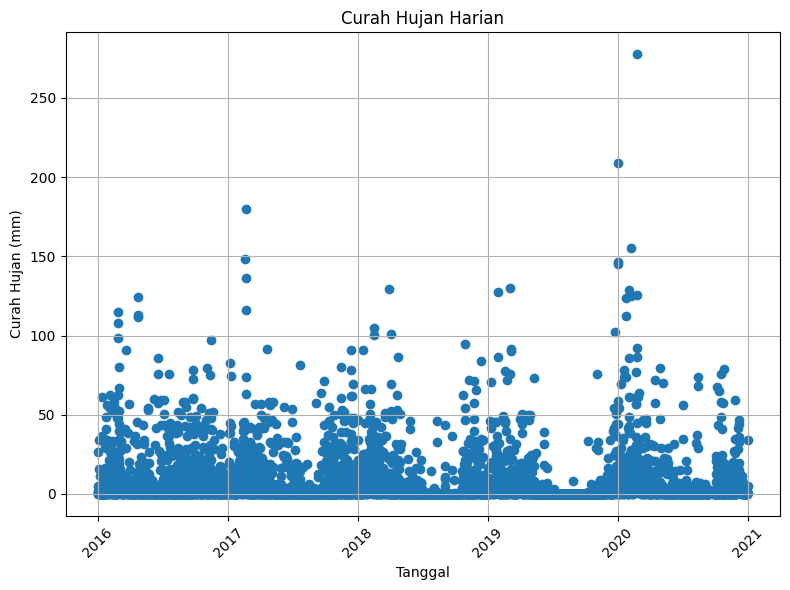

In [31]:
plot_weather_data(df, 'date', 'RR', 'Curah Hujan Harian', 'Tanggal', 'Curah Hujan (mm)')

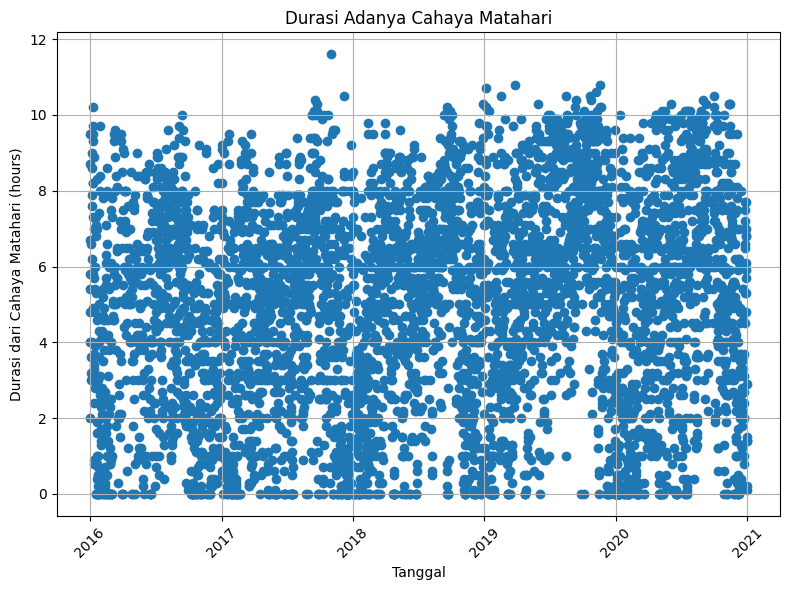

In [32]:
plot_weather_data(df, 'date', 'ss', 'Durasi Adanya Cahaya Matahari', 'Tanggal', 'Durasi dari Cahaya Matahari (hours)')

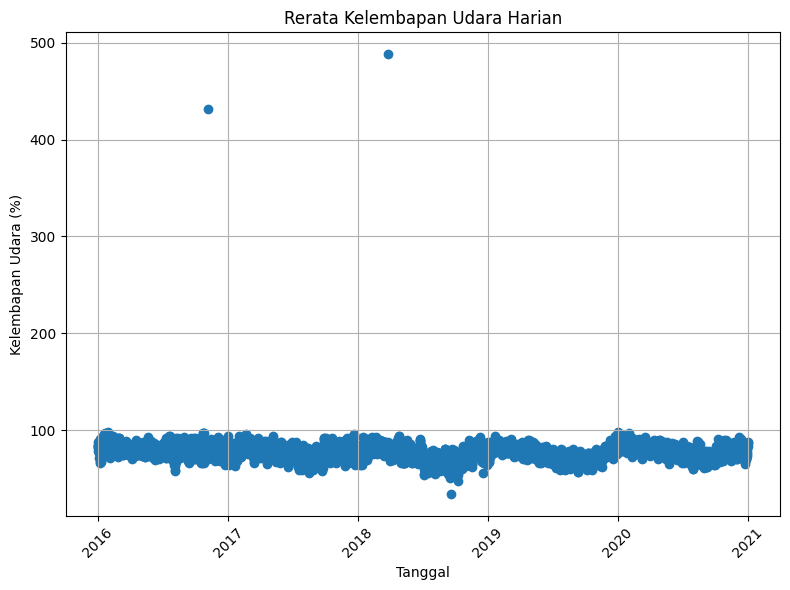

In [33]:
plot_weather_data(df, 'date', 'RH_avg', 'Rerata Kelembapan Udara Harian', 'Tanggal', 'Kelembapan Udara (%)')

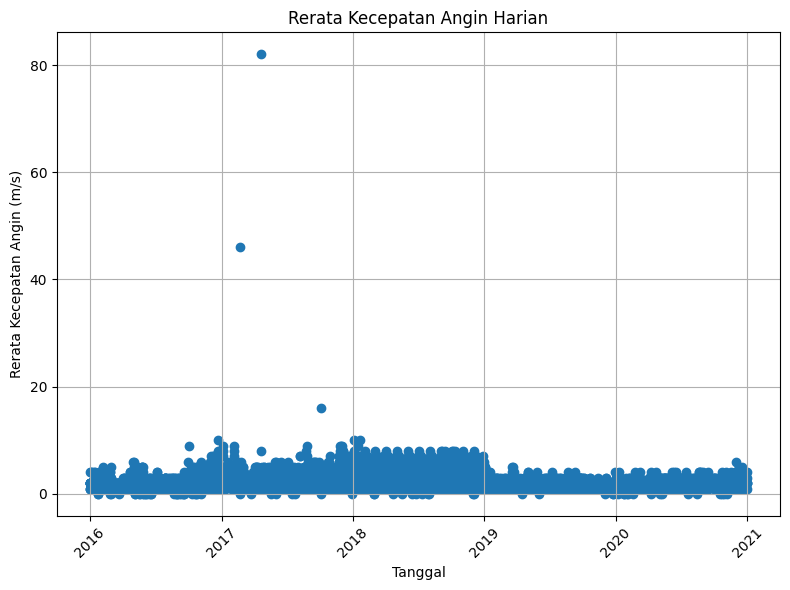

In [34]:
plot_weather_data(df, 'date', 'ff_avg', 'Rerata Kecepatan Angin Harian', 'Tanggal', 'Rerata Kecepatan Angin (m/s)')

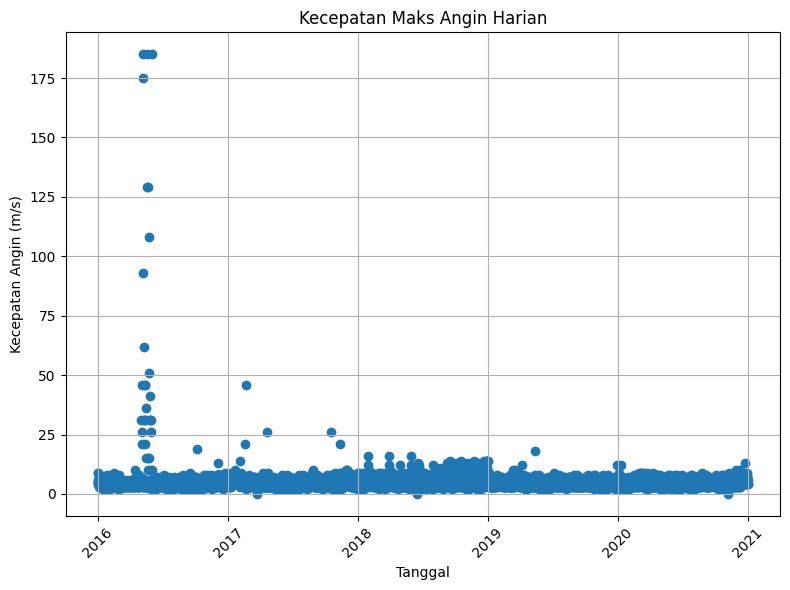

In [35]:
plot_weather_data(df, 'date', 'ff_x', 'Kecepatan Maks Angin Harian', 'Tanggal', 'Kecepatan Angin (m/s)')

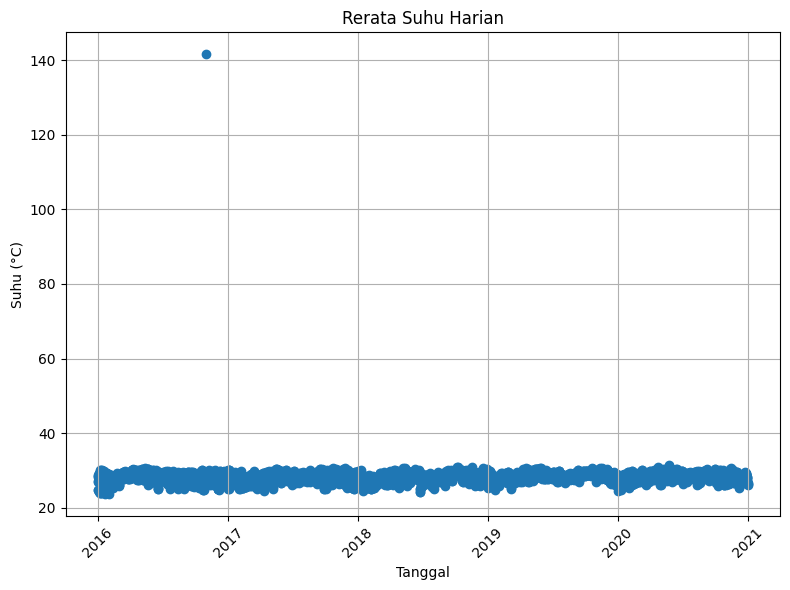

In [36]:
plot_weather_data(df, 'date', 'Tavg', 'Rerata Suhu Harian', 'Tanggal', 'Suhu (°C)')

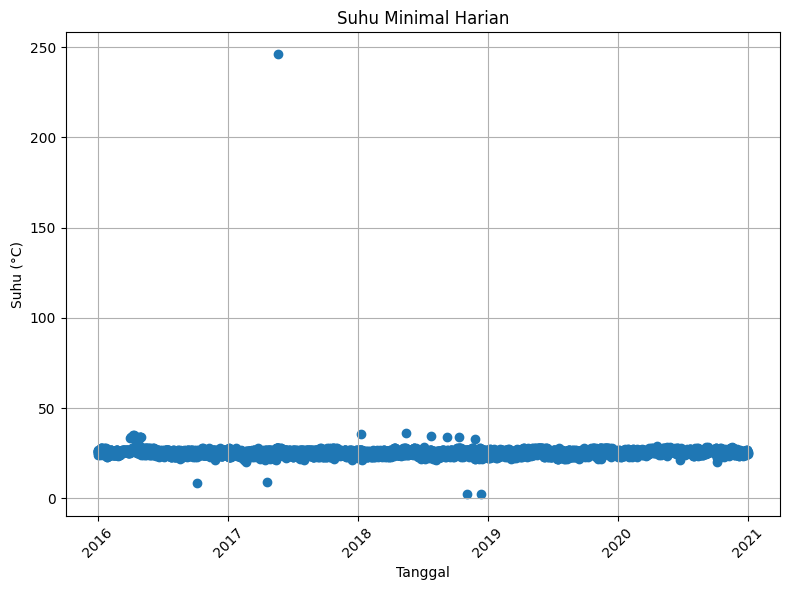

In [37]:
plot_weather_data(df, 'date', 'Tn', 'Suhu Minimal Harian', 'Tanggal', 'Suhu (°C)')

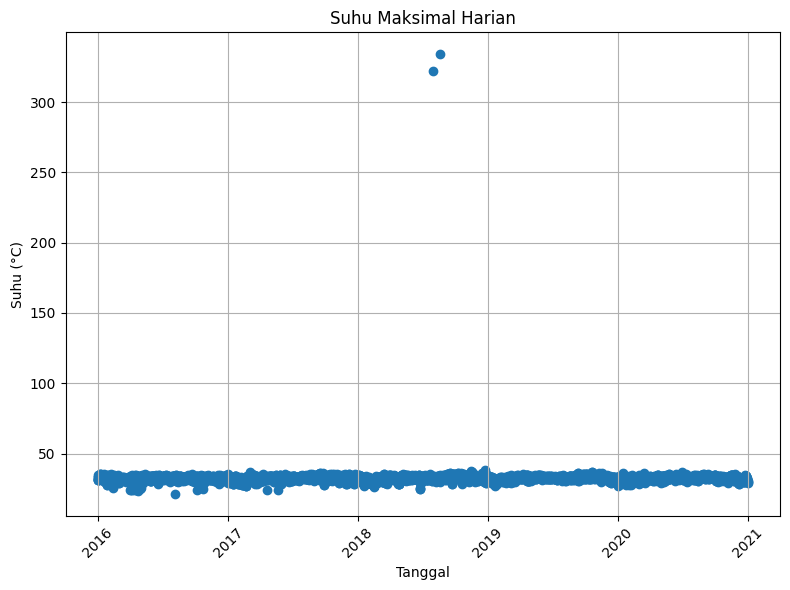

In [38]:
plot_weather_data(df, 'date', 'Tx', 'Suhu Maksimal Harian', 'Tanggal', 'Suhu (°C)')

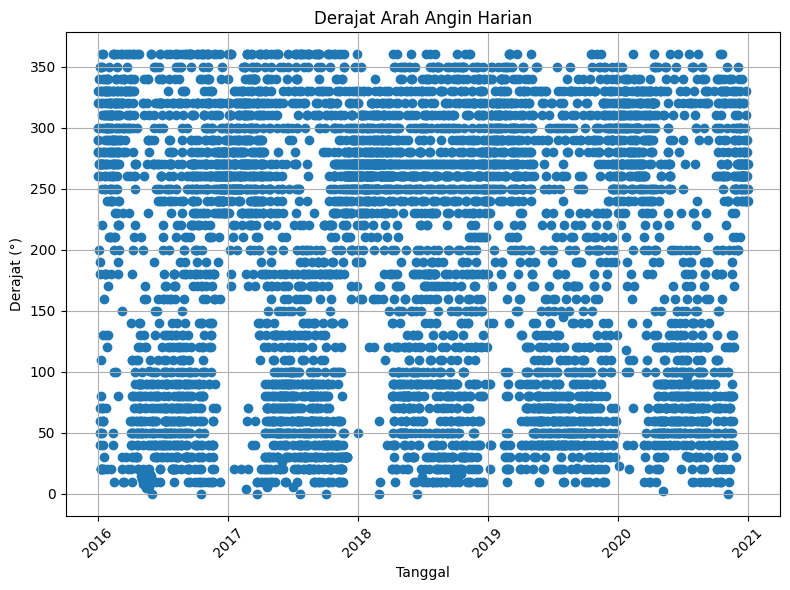

In [39]:
plot_weather_data(df, 'date', 'ddd_x', 'Derajat Arah Angin Harian', 'Tanggal', 'Derajat (°)')

### Korelasi

#### Korelasi antar kolom numerik

In [40]:
num_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

<Axes: >

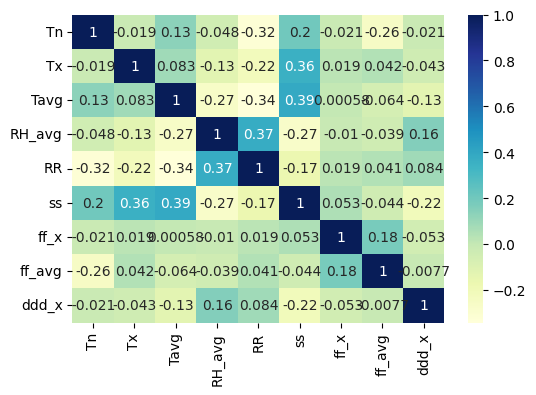

In [41]:
fig = plt.figure(figsize=(6, 4))
sns.heatmap(df[num_cols].corr(), cmap='YlGnBu', annot=True)

#### Korelasi dengan kolom target

In [42]:
def plot_correlation_heatmap(df, column1, column2):
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[[column1, column2]].corr()
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    heatmap.set_title(f'Correlation between {column1} and {column2}', fontdict={'fontsize': 18}, pad=12)
    plt.show()

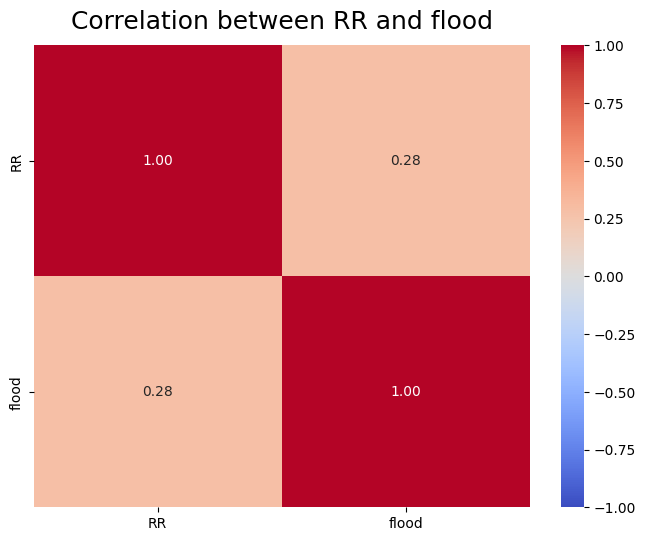

In [43]:
plot_correlation_heatmap(df, 'RR', 'flood')

Ternyata terdapat korelasi yang positif diantara curah hujan dan juga kejadian banjir

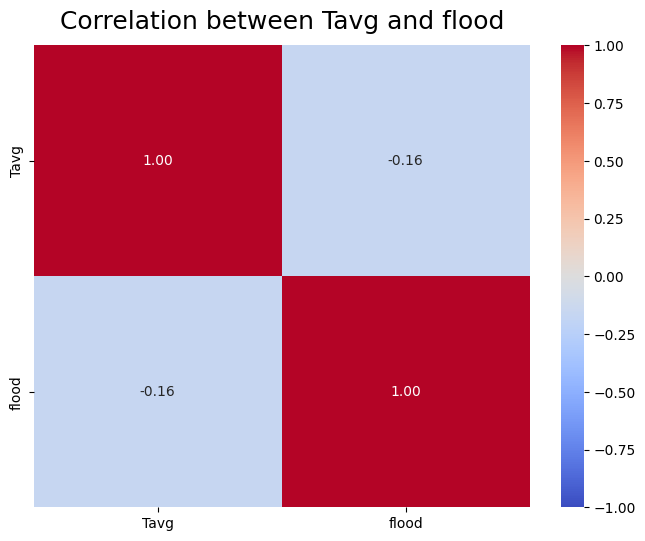

In [44]:
plot_correlation_heatmap(df, 'Tavg', 'flood')

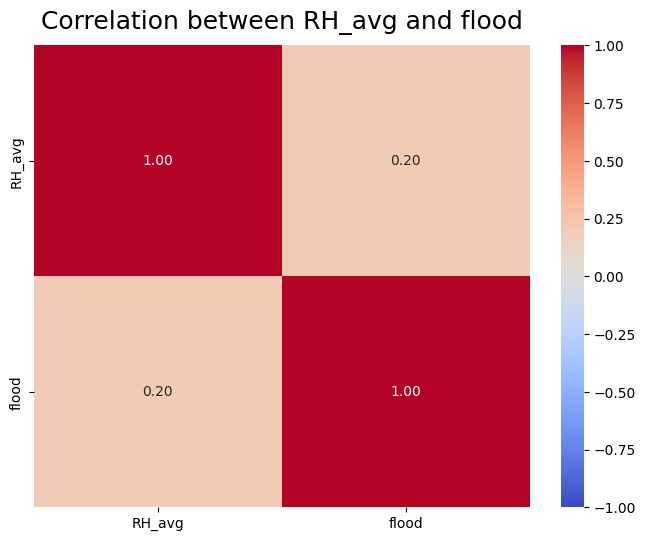

In [45]:
plot_correlation_heatmap(df, 'RH_avg', 'flood')

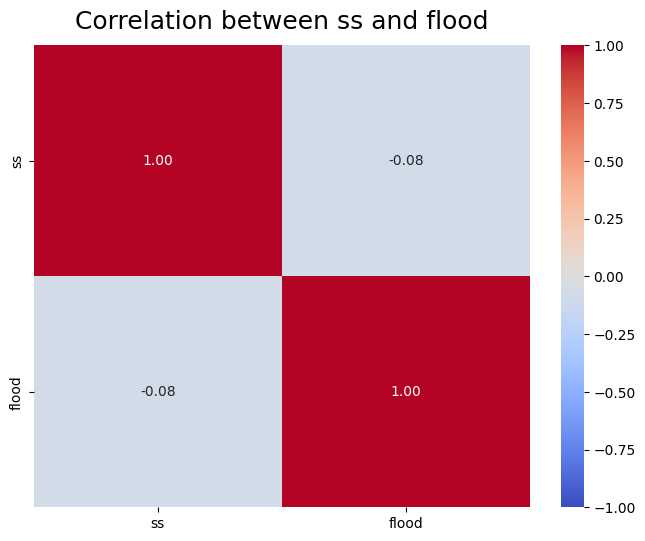

In [46]:
plot_correlation_heatmap(df, 'ss', 'flood')

Text(70.72222222222221, 0.5, 'Wind Direction')

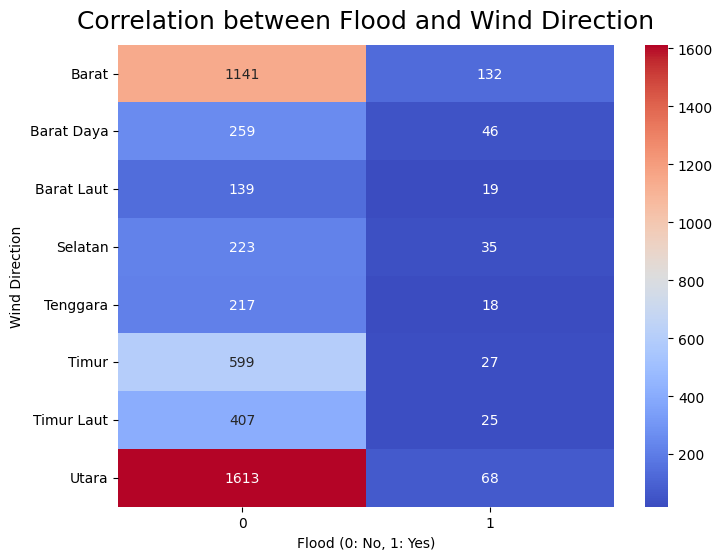

In [47]:
df_copy = df.copy()
#Bersihin spasi

df_copy['ddd_car'] = df_copy['ddd_car'].str.strip()
#Mapping
wind_direction_map = {'N': 'Utara', 'NE': 'Timur Laut', 'E': 'Timur', 'SE': 'Tenggara',
                      'S': 'Selatan', 'SW': 'Barat Daya', 'W': 'Barat', 'NW': 'Barat Laut'}


df_copy['ddd_car'] = df_copy['ddd_car'].map(wind_direction_map)
#Pake pivot table
correlation_df = pd.pivot_table(df_copy, index='ddd_car', columns='flood', aggfunc='size', fill_value=0)

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='d')
heatmap.set_title('Correlation between Flood and Wind Direction', fontdict={'fontsize': 18}, pad=12)
plt.xlabel('Flood (0: No, 1: Yes)')
plt.ylabel('Wind Direction')


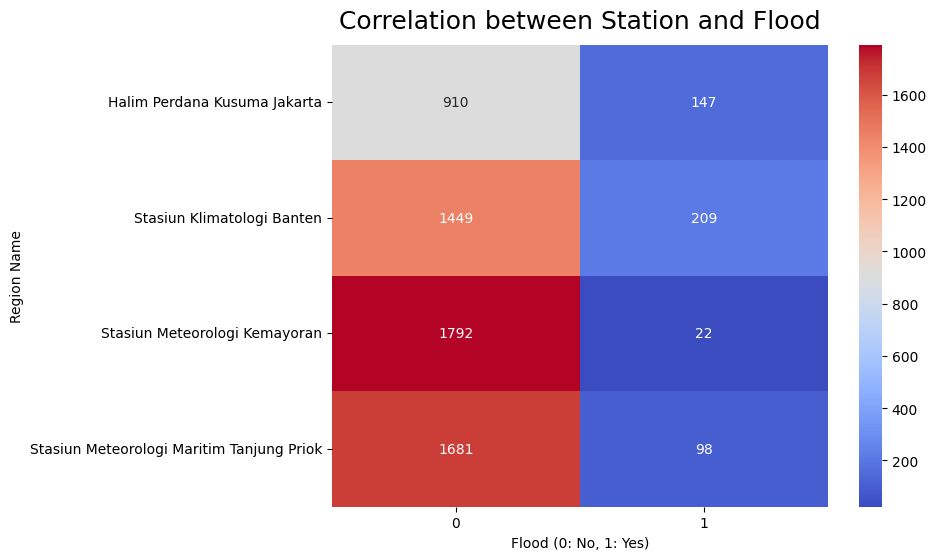

In [48]:
df_copy['station_name'] = df_copy['station_name'].str.strip()

# Pivot table untuk menghitung korelasi antara region_name dan kejadian banjir
correlation_df = pd.pivot_table(df_copy, index='station_name', columns='flood', aggfunc='size')

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='d')
heatmap.set_title('Correlation between Station and Flood', fontdict={'fontsize': 18}, pad=12)
plt.xlabel('Flood (0: No, 1: Yes)')
plt.ylabel('Region Name')
plt.show()

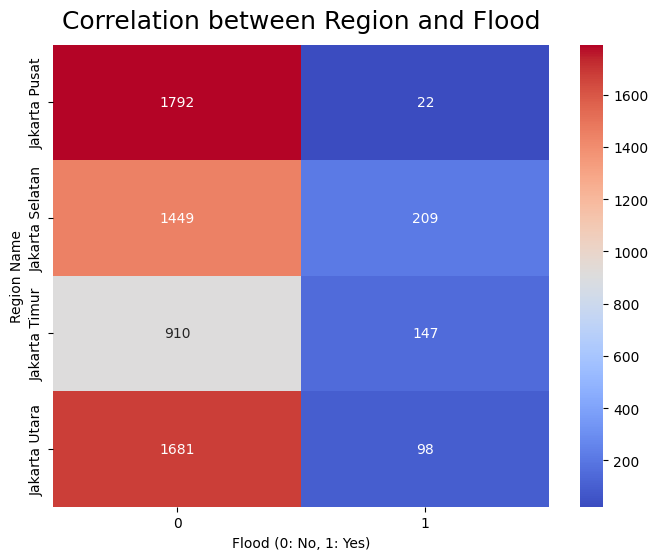

In [49]:
df_copy['region_name'] = df_copy['region_name'].str.strip()

# Pivot table untuk menghitung korelasi antara region_name dan kejadian banjir
correlation_df = pd.pivot_table(df_copy, index='region_name', columns='flood', aggfunc='size')

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='d')
heatmap.set_title('Correlation between Region and Flood', fontdict={'fontsize': 18}, pad=12)
plt.xlabel('Flood (0: No, 1: Yes)')
plt.ylabel('Region Name')
plt.show()

### Wind Rose Plot

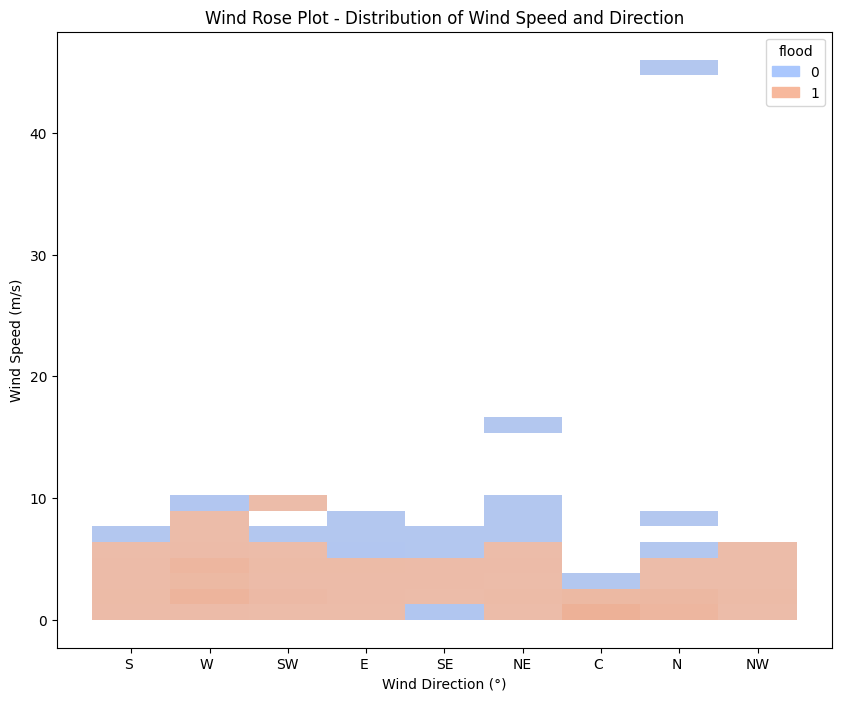

In [50]:
# Visualisasi Wind Rose Plot untuk mencari hubungan antara arah dan kecepatan angin dengan banjir
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='ddd_car', y='ff_avg', hue='flood', bins=36, multiple="stack", palette='coolwarm')
plt.title('Wind Rose Plot - Distribution of Wind Speed and Direction')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Wind Speed (m/s)')
plt.show()